In [1]:
!pip install isbnlib

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import isbnlib
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from progressbar import ProgressBar
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
print('Libraries imported!')

Libraries imported!


In [3]:
df = pd.read_csv(r'books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.index = df['bookID']

In [6]:
#Deleting unrelevant columns 'bookID' , 'isbn' , 'num_pages' 
#I am deleting 'num_pages because some books has 0 page or 1 such as 'The Silmarillion  Volume 3 is 0 page'
#Keeping isbn13 because it is unique value for each book
#Also when i examine dataset I found in 'authors' column 'NOT A BOOK' named authors which I will delete those
df.drop(['bookID','isbn'], axis = 1, inplace=True)

In [7]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
title                 0
authors               0
average_rating        0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


In [8]:
df.head()

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [9]:
print('There are {} unique categories of languages.'.format(len(df['language_code'].unique())))

There are 27 unique categories of languages.


In [10]:
print('There are {} books of Agatha Christie.'.format(df.loc[df.authors == 'Agatha Christie', 'authors'].count()))

There are 33 books of Agatha Christie.


In [11]:
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [12]:
#Merging 'en-US','en-GB','en-CA' to 'eng'
df.replace(to_replace='en-US', value = 'eng', inplace=True)
df.replace(to_replace='en-GB', value = 'eng', inplace=True)
df.replace(to_replace='en-CA', value = 'eng', inplace=True)

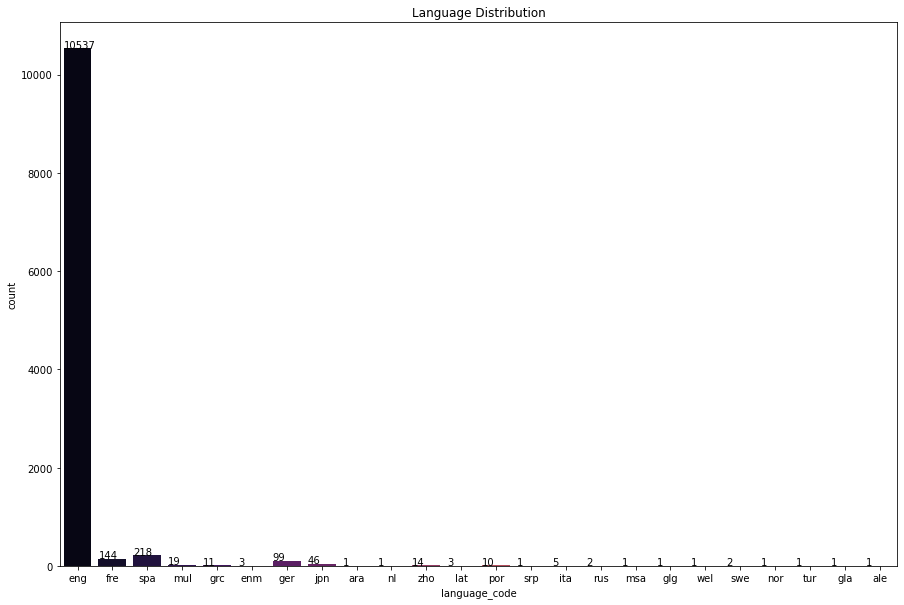

In [13]:
#Language Distribution
fig = plt.figure(figsize=(15,10))
plt.title("Language Distribution")
ax = sns.countplot(df['language_code'], palette='inferno')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+10))

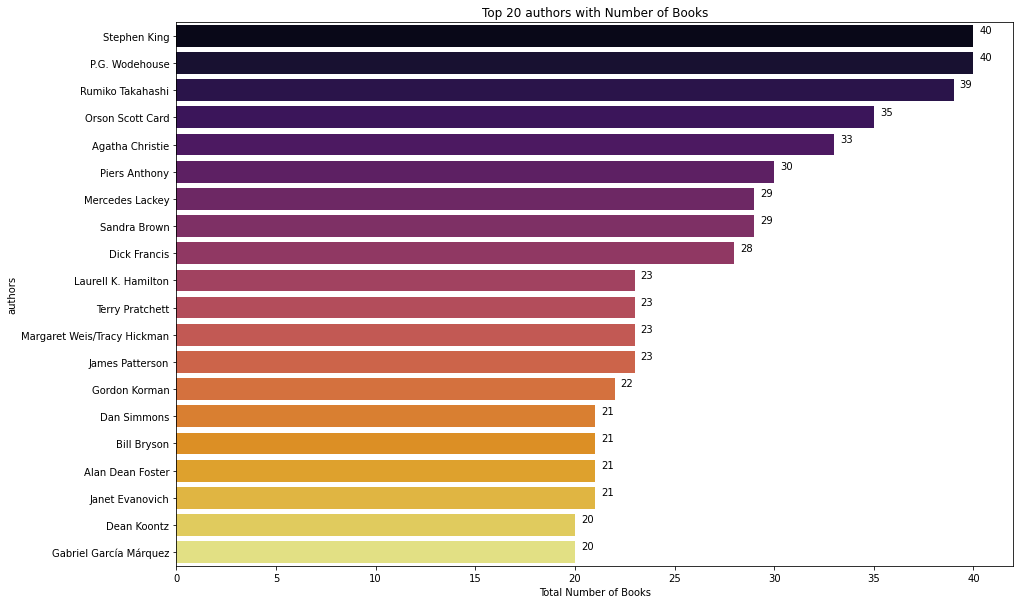

In [14]:
#Max number of books published by authors
book_count = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(20).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(book_count['title'], book_count.index, palette='inferno')
ax.set_title("Top 20 authors with Number of Books")
ax.set_xlabel("Total Number of Books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.3, str(round(i.get_width())), fontsize = 10, color = 'k')

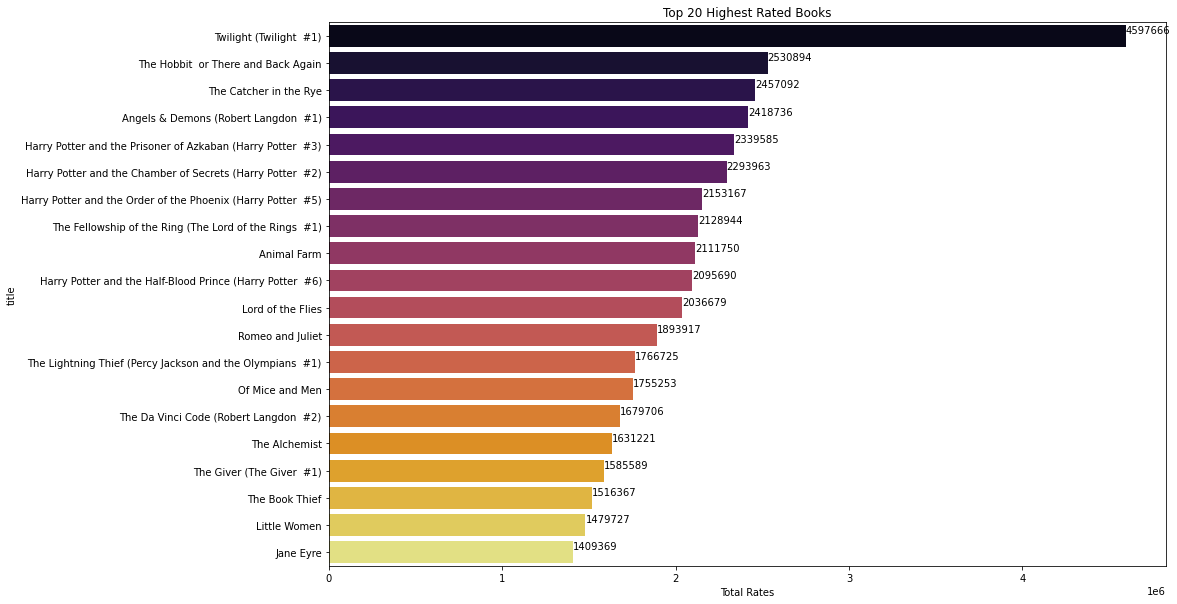

In [15]:
#Top 20 Highest Rated Books
most_rated_books = df.sort_values('ratings_count', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated_books['ratings_count'], most_rated_books.index, palette='inferno')
ax.set_title("Top 20 Highest Rated Books")
ax.set_xlabel("Total Rates")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.3, str(round(i.get_width())), fontsize = 10, color = 'k')

In [16]:
df['authors'].value_counts().head(20)

Stephen King                   40
P.G. Wodehouse                 40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Sandra Brown                   29
Mercedes Lackey                29
Dick Francis                   28
Terry Pratchett                23
James Patterson                23
Laurell K. Hamilton            23
Margaret Weis/Tracy Hickman    23
Gordon Korman                  22
Bill Bryson                    21
Janet Evanovich                21
Alan Dean Foster               21
Dan Simmons                    21
Gabriel García Márquez         20
Dean Koontz                    20
Name: authors, dtype: int64

Text(0.5, 0, 'Average rating')

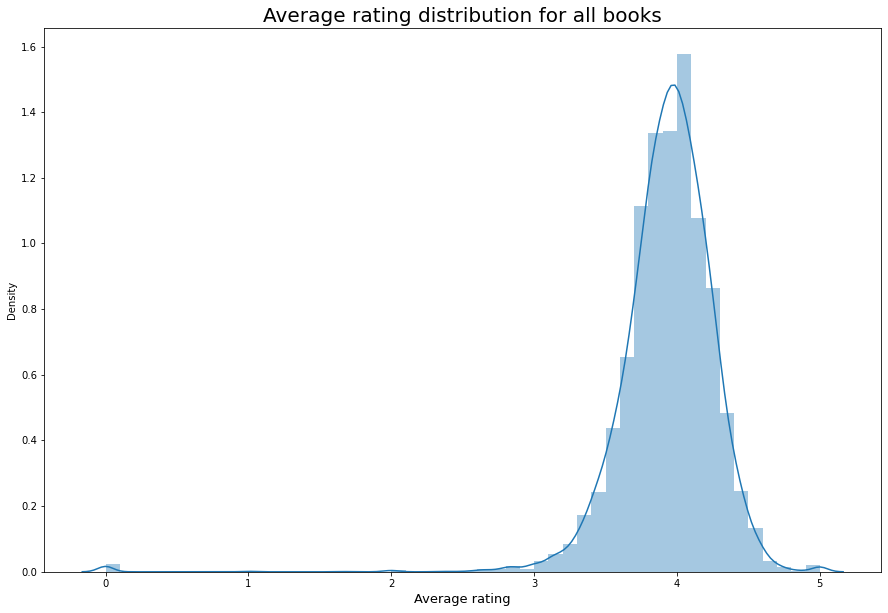

In [17]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

In [18]:
#Gathering the data for the year column for the books from their ISBN 13 values
def bookdata(df):
    year=[]
    pbar = ProgressBar()
    for isbn in pbar(df.isbn13):
        try:
            details = isbnlib.meta(isbn)
            year.append(details['Year'])
        except :
            #Trying out with goodreads api now
                try:
                    y = html(isbn)
                    year_extracted = reg(y) #Extracting year with regex
                    year.append(y)
                except:
                    year.append('0')                
    return year
# The finction for getting the final dataframe for the charts
def final_df(df1, l):
    year_df = pd.DataFrame(l, columns=['Year'])
    df1 = df1.reset_index(drop=True)
    final = df1[['authors', 'average_rating', 'title']].join(year_df)
    return final

In [19]:
authors = ['Gabriel García Márquez', 'Jack London', 'George Orwell', 'Jules Verne', 'Richard P. Feynman']

In [20]:
author_df0 = df[df['authors']==authors[0]]
author_df0 = author_df0[author_df0['language_code']=='eng']
author_df0

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,
7600,One Hundred Years Of Solitude,Gabriel García Márquez,4.07,9781857152234,eng,416,376,53,9/21/1995,Everyman
22175,Strange Pilgrims,Gabriel García Márquez,4.03,9781400034697,eng,208,6952,422,11/14/2006,Vintage
23876,Of Love and Other Demons,Gabriel García Márquez,3.98,9780517405093,eng,160,35045,1116,5/2/1995,Penguin Group (USA)


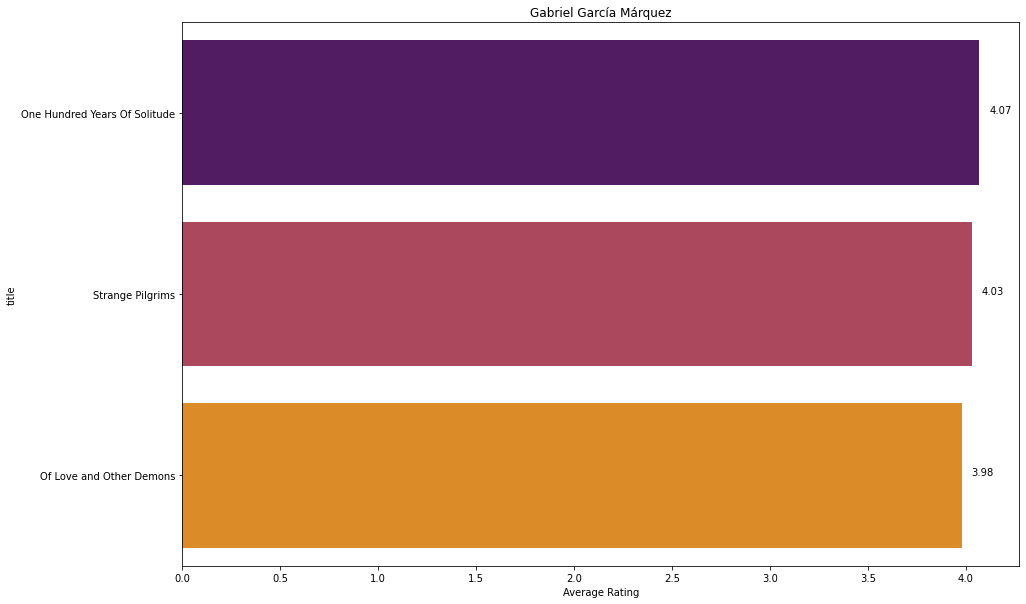

In [21]:
#Books Ratings of Gabriel García Márquez
author0 = author_df0.sort_values('average_rating', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(author0['average_rating'], author0.index, palette='inferno')
ax.set_title("Gabriel García Márquez")
ax.set_xlabel("Average Rating")
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.4, str(i.get_width()), fontsize = 10, color = 'k')

In [22]:
author_df1 = df[df['authors']==authors[1]]
author_df1

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,
43035,White Fang,Jack London,3.98,9780439236195,eng,252,119589,3124,1/1/2001,Scholastic Paperbacks
43037,The Call of the Wild White Fang and Other Sto...,Jack London,3.99,9780192835147,eng,400,18720,192,8/20/1998,Oxford University Press USA
43046,Jack London Illustrated: The Call of the Wild/...,Jack London,4.26,9780517309803,eng,761,20,1,10/2/1993,Random House Value Publishing
43049,The Sea Wolf,Jack London,4.04,9781598184310,eng,425,19091,851,6/1/2005,Alan Rodgers Books


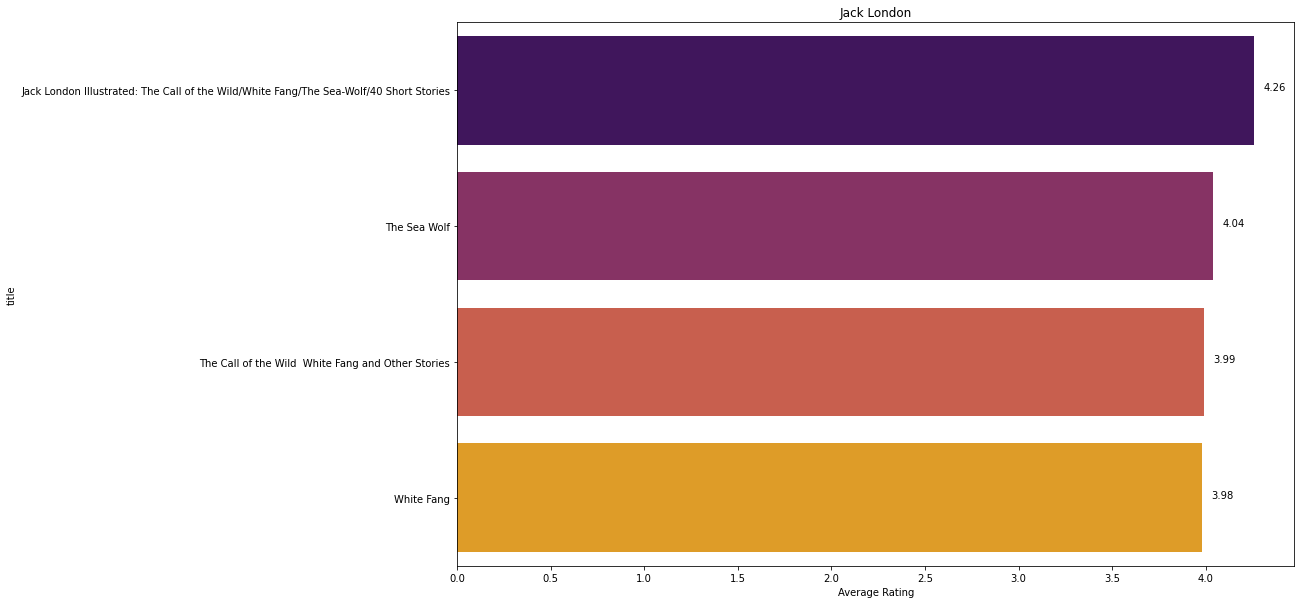

In [23]:
#Books Ratings of Jack London
author1 = author_df1.sort_values('average_rating', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(author1['average_rating'], author1.index, palette='inferno')
ax.set_title("Jack London")
ax.set_xlabel("Average Rating")
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.4, str(i.get_width()), fontsize = 10, color = 'k')

In [24]:
author_df2 = df[df['authors']==authors[2]]
author_df2

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,
5478,Nineteen Eighty-Four,George Orwell,4.18,9781421808321,eng,387,215,17,7/1/2005,1st World Library
9644,Why I Write,George Orwell,4.03,9780143036357,eng,120,6389,541,9/6/2005,Penguin Books
9648,Keep the Aspidistra Flying,George Orwell,3.88,9780141183725,eng,277,11970,688,10/26/2000,Penguin Books Ltd
30557,Shooting an Elephant,George Orwell,4.12,9780141187396,eng,368,7029,255,6/5/2003,Penguin


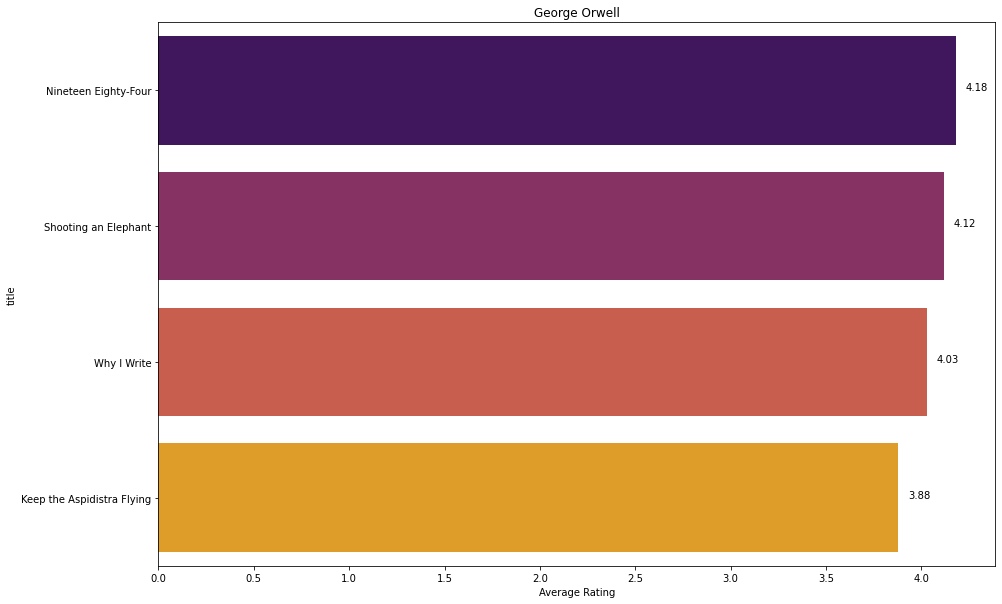

In [25]:
#Books Ratings of George Orwell
author1 = author_df2.sort_values('average_rating', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(author1['average_rating'], author1.index, palette='inferno')
ax.set_title("George Orwell")
ax.set_xlabel("Average Rating")
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.4, str(i.get_width()), fontsize = 10, color = 'k')

In [26]:
author_df3 = df[df['authors']==authors[3]]
author_df3

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,
32827,From the Earth to the Moon (Extraordinary Voya...,Jules Verne,3.78,9781598184549,eng,136,17325,421,10/1/2006,Aegypan
32829,Journey to the Center of the Earth (Extraordin...,Jules Verne,3.86,9780553213973,eng,240,107189,2510,4/25/2006,Bantam
32832,The Lighthouse at the End of the World,Jules Verne,3.64,9781589630949,eng,260,1752,40,3/20/2001,Fredonia Books (NL)
32849,Adrift in the Pacific: Two Years Holiday (Extr...,Jules Verne,3.99,9781410102157,eng,300,1956,39,4/24/2003,Fredonia Books (NL)


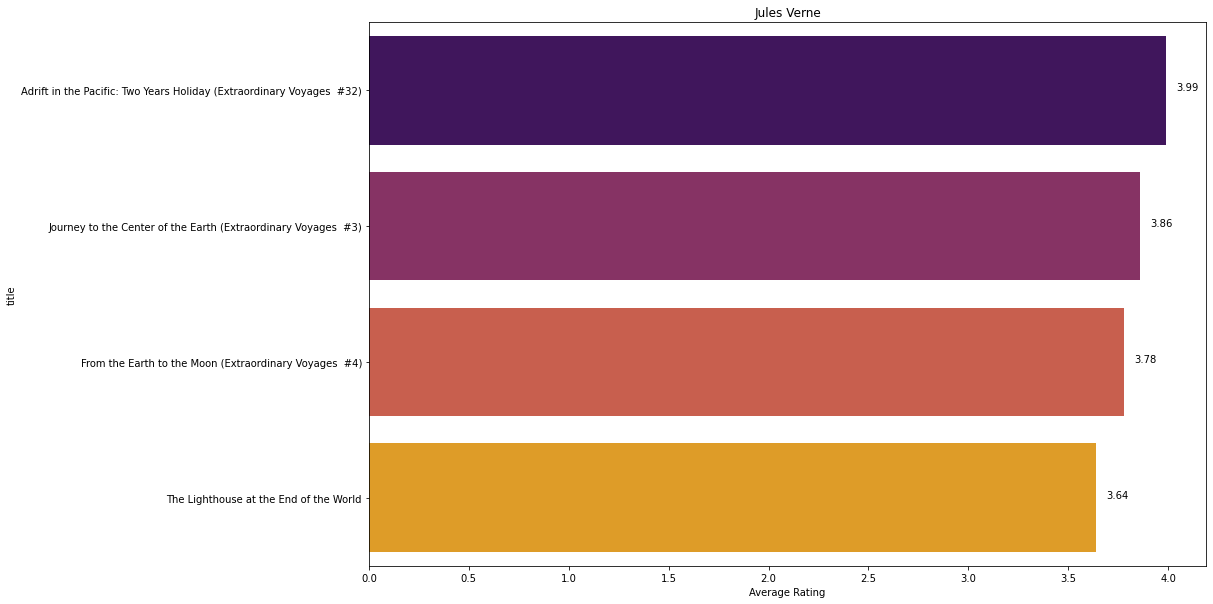

In [27]:
#Books Ratings of Jules Verne
author3 = author_df3.sort_values('average_rating', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(author3['average_rating'], author3.index, palette='inferno')
ax.set_title("Jules Verne")
ax.set_xlabel("Average Rating")
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.4, str(i.get_width()), fontsize = 10, color = 'k')

In [28]:
author_df4 = df[df['authors']==authors[4]]
author_df4

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,
5544,Surely You're Joking Mr. Feynman!: Adventures...,Richard P. Feynman,4.28,9780393316049,eng,391,106526,3685,4/12/1997,W. W. Norton & Company
5548,What Do You Care What Other People Think?,Richard P. Feynman,4.27,9780393320923,eng,256,15700,556,1/11/2001,W.W. Norton & Company
5552,QED: The Strange Theory of Light and Matter,Richard P. Feynman,4.24,9780691024172,eng,158,13463,320,10/21/1988,Princeton University Press
17275,The Very Best of the Feynman Lectures,Richard P. Feynman,4.18,9780465099009,eng,180,123,21,10/4/2005,Basic Books
17276,The Feynman Lectures on Physics Vols 3-4,Richard P. Feynman,4.71,9780738209258,eng,0,21,0,5/12/2004,Basic Books
17277,The Feynman Lectures on Physics Vols 7-8,Richard P. Feynman,4.80,9780738209272,eng,0,20,0,1/3/2006,Basic Books
17279,The Feynman Lectures on Physics Vols 5-6,Richard P. Feynman,4.59,9780738202839,eng,12,22,0,11/3/2004,Basic Books
17364,Surely You're Joking Mr. Feynman!,Richard P. Feynman,4.28,9780099173311,eng,350,1837,178,12/17/2006,Vintage
17375,The Meaning of It All: Thoughts of a Citizen-S...,Richard P. Feynman,4.05,9780465023943,eng,144,5907,290,4/6/2005,Basic Books


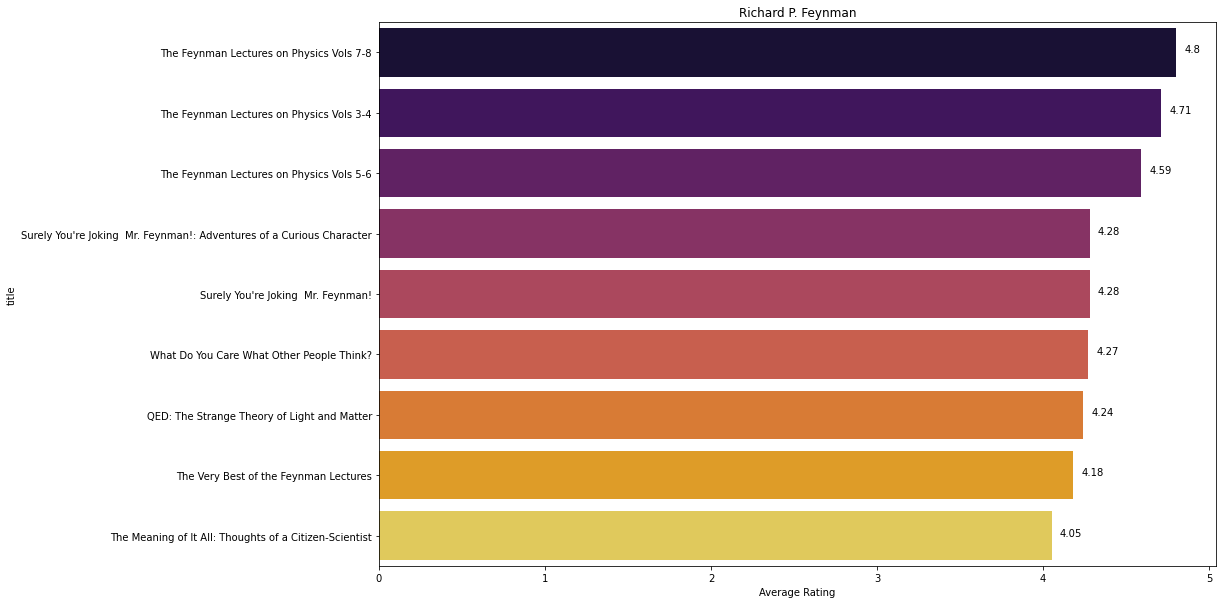

In [29]:
#Books Ratings of Richard P. Feynman
author4 = author_df4.sort_values('average_rating', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(author4['average_rating'], author4.index, palette='inferno')
ax.set_title("Richard P. Feynman")
ax.set_xlabel("Average Rating")
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.4, str(i.get_width()), fontsize = 10, color = 'k')

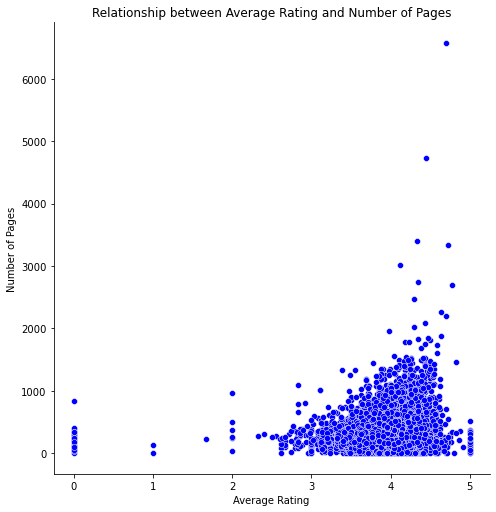

In [30]:
#Relationship between Average Rating and Number of Pages
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'blue',sizes=(100, 200), height=7, marker='o')
plt.title("Relationship between Average Rating and Number of Pages",fontsize = 12)
ax.set_axis_labels("Average Rating", "Number of Pages")

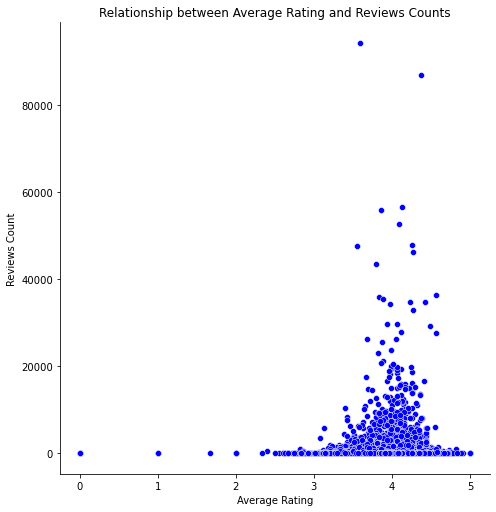

In [31]:
#Relationship between Average Rating and Reviews Counts
ax = sns.relplot(x="average_rating", y="text_reviews_count", data = df, color = 'blue',sizes=(100, 200), height=7, marker='o')
plt.title("Relationship between Average Rating and Reviews Counts",fontsize = 12)
ax.set_axis_labels("Average Rating", "Reviews Count")

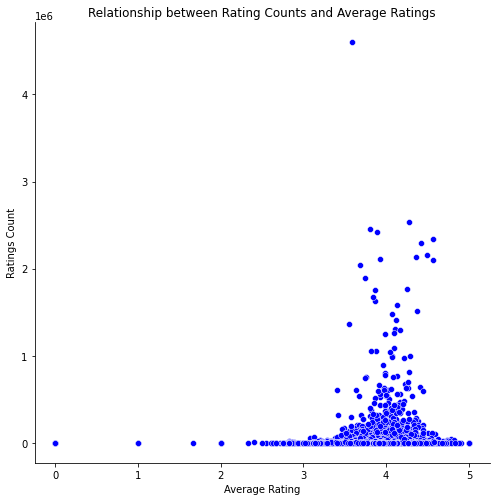

In [32]:
#Relationship between Average Rating and Reviews Counts
ax = sns.relplot(x="average_rating", y="ratings_count", data = df, color = 'blue',sizes=(100, 200), height=7, marker='o')
plt.title("Relationship between Rating Counts and Average Ratings",fontsize = 12)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [33]:
trial = df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

Text(0.5, 1.0, 'Elbow Curve')

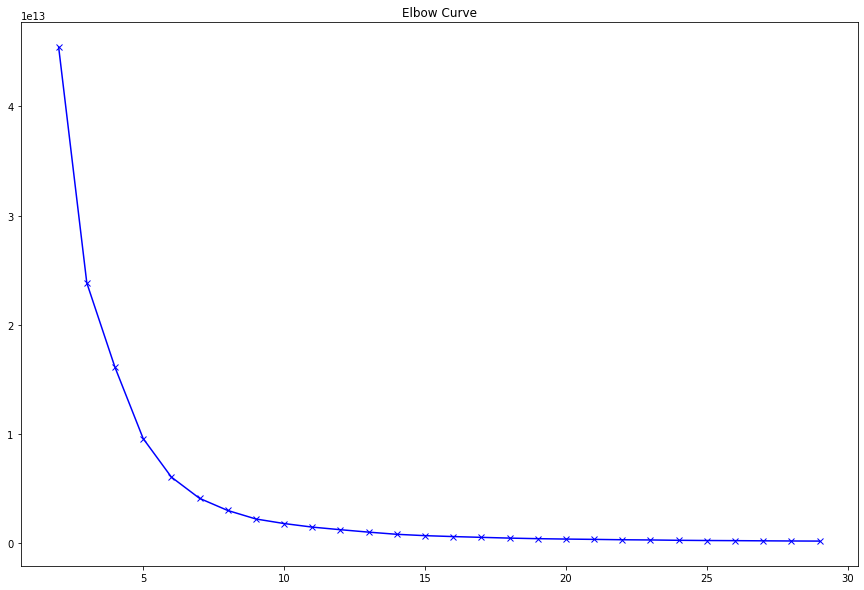

In [34]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [35]:
#Computing K means with K = 5, thus, taking it as 5 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

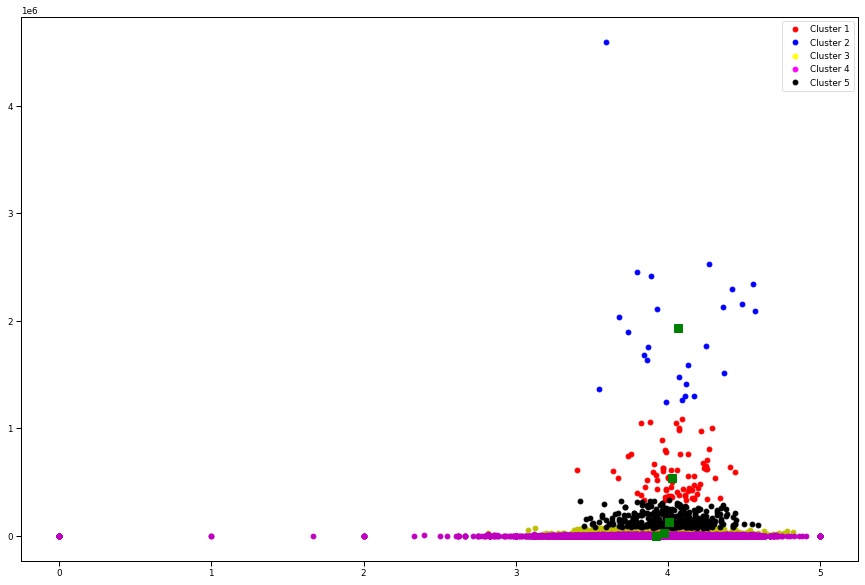

In [36]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )


circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )
plt.show()

In [37]:
def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

In [38]:
df['Ratings_Dist'] = segregation(df)

11123


In [39]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)
books_features.head()

,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,average_rating,ratings_count
bookID,,,,,,,
1,0,0,0,0,1,4.57,2095690
2,0,0,0,0,1,4.49,2153167
4,0,0,0,0,1,4.42,6333
5,0,0,0,0,1,4.56,2339585
8,0,0,0,0,1,4.78,41428


In [40]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [41]:
np.round(books_features, 2)

array([[0.  , 0.  , 0.  , ..., 1.  , 0.91, 0.46],
       [0.  , 0.  , 0.  , ..., 1.  , 0.9 , 0.47],
       [0.  , 0.  , 0.  , ..., 1.  , 0.88, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.79, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.74, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.78, 0.  ]])

In [42]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

In [43]:
def get_index_from_name(name):
    return df[df["title"]==name].index.tolist()[0]

all_books_names = list(df.title.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))
            
def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["title"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["title"])

In [54]:
name = input("Enter any text: ")
print(print_similar_books(name))

Enter any text: The Very Best of the Feynman Lectures


IndexError: index 17275 is out of bounds for axis 0 with size 11123

In [55]:
print_similar_books("The Very Best of the Feynman Lectures")

IndexError: index 17275 is out of bounds for axis 0 with size 11123